In [5]:
from mylibrary import * 
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
file = open("endsemfit.txt", "r+")

file_list = []

for line in file:
    file_list.append(line)

data =[]
for i in range(len(file_list)):
    char_list = file_list[i].split()
    for i in range(len(char_list)):
        char_list[i] = int(char_list[i])
    data.append(char_list)

In [9]:
time_list = np.array([elem[0] for elem in data])
count_list = np.array([elem[1] for elem in data]) 
uncertainty_list = np.array([elem[2] for elem in data])

Text(0, 0.5, 'Counts')

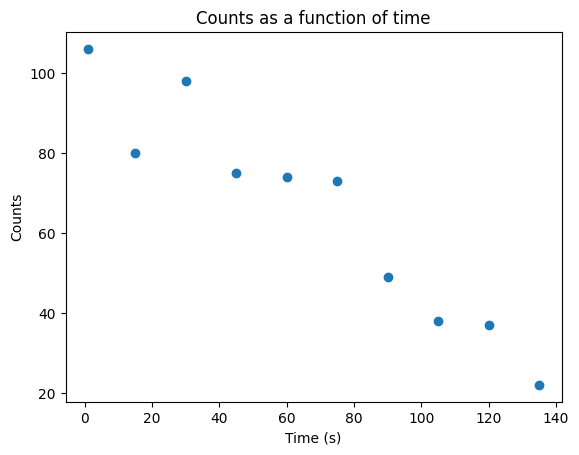

In [24]:
plt.scatter(time_list, count_list)
plt.title('Counts as a function of time')
plt.xlabel('Time (s)')
plt.ylabel('Counts')

In [27]:
log_counts = np.log(count_list)
log_uncertainties = uncertainty_list/count_list

# defining the linear model function
def linear_model(x, m, c):
    return m * x + c

# performing chi-square minimization using curve_fit with sigma for weighting
popt, pcov = curve_fit(linear_model, time_list, log_counts, sigma=log_uncertainties, absolute_sigma=True)

# extracting the m and c from fit parameters
m, c = popt
tau = -1/m                                # lifetime
delta_tau = np.sqrt(pcov[0, 0]) / (m**2)  # error in lifetime

print("Lifetime (tau): " + '%.3f'%tau + " s")
print("Error in tau: " + '%.3f'%delta_tau + " s")

Lifetime (tau): 112.031 s
Error in tau: 12.601 s


Number of degrees of freedom $= N - 1 = 9$

For a right-tailed distribution, the critical value of $\chi^2$ at 5% for 9 degrees of freedom is 16.919

We found that for our data, $\chi^2 = 12.601$

Therefore, the null hypothesis is retained, since $\chi_{critcial}^2 > \chi_{calculated}^2$